In [65]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, VALID_METRICS

# Homemade
from ProjectiveTransformation import ProjectiveTransformation
from RigidTransformation import RigidTransformation

# Transformation type
transformationTypes = ['rigid','projective']
transformation = transformationTypes[1]

In [66]:
# custom distance 
def distance(a,b):
    return np.arccos(np.dot(a,b)/(np.linalg.norm(a)*np.linalg.norm(b)))

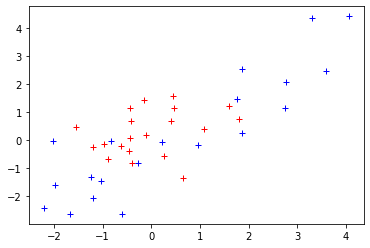

In [67]:
# Data

# Number of points
n = 20

# rng
rng = np.random.default_rng(1023)

# source
source = rng.standard_normal((2,n))

#target
#theta = np.pi/8
#M = np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])
M = np.array([[1,2],[2,1]])
target = np.dot(M,source)

# display
plt.plot(source[0,:],source[1,:],'r+')
plt.plot(target[0,:],target[1,:],'b+')
plt.show()

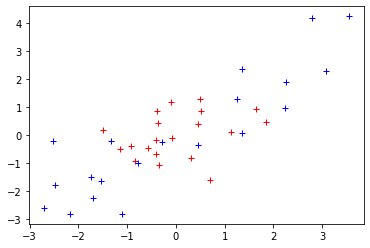

In [68]:
# translate points to their centroids
centroid_source = np.mean(source, axis=1)
centroid_target = np.mean(target, axis=1)

source_centered = source - np.vstack(centroid_source)
target_centered = target - np.vstack(centroid_target)

# homogeneous coordinates
source_centered = np.vstack((source_centered,np.ones((1,n))))
target_centered = np.vstack((target_centered,np.ones((1,n))))

# display
plt.plot(source_centered[0,:],source_centered[1,:],'r+')
plt.plot(target_centered[0,:],target_centered[1,:],'b+')
plt.show()

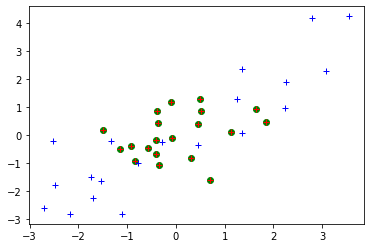

[ 7 14  2  9  5 19  9 14  9 18  7  2 18  5 17  5 19 14 19 19]


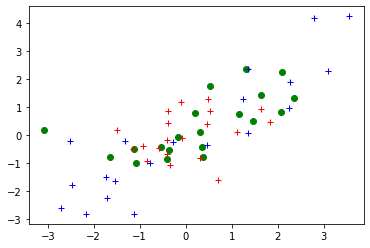

[ 7 11  2  9  5 19 12 14 15 18  7  2 18 19  7  5 19 14  2 18]


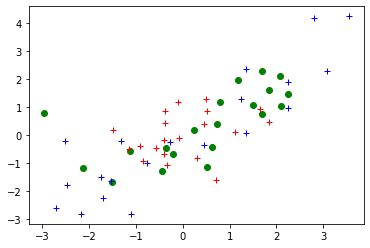

[ 1 11  2  9 16 18 12 14 15 18  7 11 18 19  7  5 19 14  2 17]


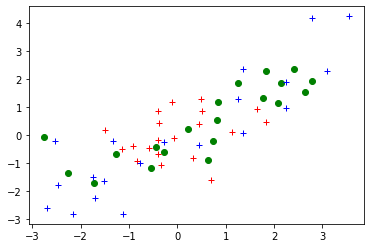

[ 1 11 11 13 16 18 12  0 15 18  1 11 18 19  7  5 19 14  2  2]


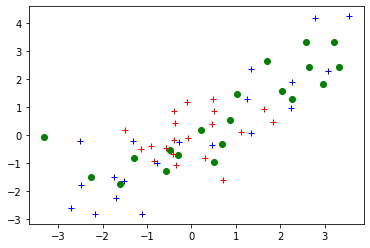

[ 1  0 11 13 16 18 12  0 15 18  1 11 18  5  7  5  5 14  2  2]


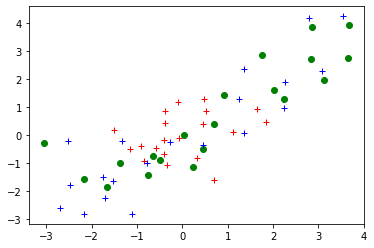

[ 1  0 11 13 16 19 12 10 15 18  1 11 18  5  7  5  5 14  2 17]


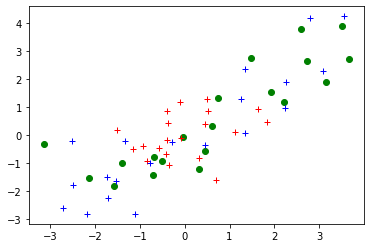

[ 1  0 11 13 16 19 12 10 15 18  1 11 18  5  7  5  5 14  2 17]


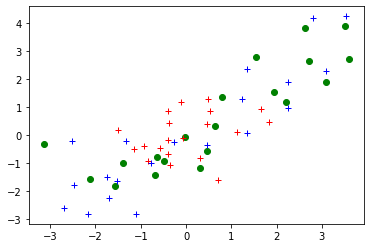

[ 1  0 11 13 16 19 12 10 15 18  1 11 18  5  7  5  5 14  2 17]


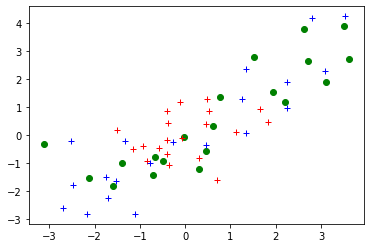

[ 1  0 11 13 16 19 12 10 15 18  1 11 18  5  7  5  5 14  2 17]


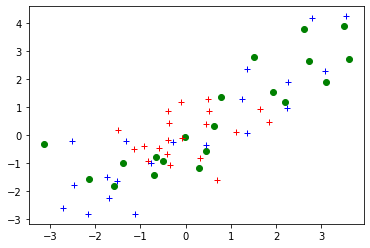

[ 1  0 11 13 16 19 12 10 15 18  1 11 18  5  7  5  5 14  2 17]


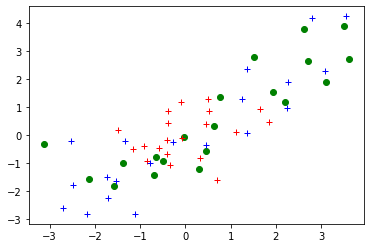

In [69]:
max_iterations = 10

result = source_centered

# display
plt.plot(result[0,:],result[1,:],'go')
plt.plot(source_centered[0,:],source_centered[1,:],'r+')
plt.plot(target_centered[0,:],target_centered[1,:],'b+')
plt.show()

# ICP loop
for i in range(max_iterations):
    
    # compute & apply the transformation that best fits
    if(transformation == 'projective'):
        
        # find the nearest neighbors
        neigh = NearestNeighbors(n_neighbors=1,algorithm='auto',metric='cosine')
        neigh.fit(target_centered.T)
        distances, indices = neigh.kneighbors(result.T, return_distance=True)
        print(indices.ravel())
        
        result = ProjectiveTransformation(result,target_centered[:,indices][:,:,0])
        
    else:
        
        # find the nearest neighbors
        neigh = NearestNeighbors(n_neighbors=1,algorithm='auto',metric='euclidean')
        neigh.fit(target_centered.T)
        distances, indices = neigh.kneighbors(result.T, return_distance=True)
        print(indices.ravel())
        
        result = RigidTransformation(result,target_centered[:,indices][:,:,0])
    
    # display
    plt.plot(result[0,:],result[1,:],'go')
    plt.plot(source_centered[0,:],source_centered[1,:],'r+')
    plt.plot(target_centered[0,:],target_centered[1,:],'b+')
    plt.show()  
    